# Import and install

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn

import requests

import os

# Functions

In [2]:
def sigla_to_province(sigla):
    sigla_map = {
        "AG": "Agrigento",
        "AL": "Alessandria",
        "AN": "Ancona",
        "AO": "Aosta",
        "AR": "Arezzo",
        "AP": "Ascoli Piceno",
        "AT": "Asti",
        "AV": "Avellino",
        "BA": "Bari",
        "BT": "Barletta-Andria-Trani",
        "BL": "Belluno",
        "BN": "Benevento",
        "BG": "Bergamo",
        "BI": "Biella",
        "BO": "Bologna",
        "BZ": "Bolzano",
        "BS": "Brescia",
        "BR": "Brindisi",
        "CA": "Cagliari",
        "CL": "Caltanissetta",
        "CB": "Campobasso",
        "CI": "Carbonia-Iglesias",
        "CE": "Caserta",
        "CT": "Catania",
        "CZ": "Catanzaro",
        "CH": "Chieti",
        "CO": "Como",
        "CS": "Cosenza",
        "CR": "Cremona",
        "KR": "Crotone",
        "CN": "Cuneo",
        "EN": "Enna",
        "FM": "Fermo",
        "FE": "Ferrara",
        "FI": "Firenze",
        "FG": "Foggia",
        "FC": "Forlì-Cesena",
        "FR": "Frosinone",
        "GE": "Genova",
        "GO": "Gorizia",
        "GR": "Grosseto",
        "IM": "Imperia",
        "IS": "Isernia",
        "AQ": "L'Aquila",
        "SP": "La Spezia",
        "LT": "Latina",
        "LE": "Lecce",
        "LC": "Lecco",
        "LI": "Livorno",
        "LO": "Lodi",
        "LU": "Lucca",
        "MC": "Macerata",
        "MN": "Mantova",
        "MS": "Massa-Carrara",
        "MT": "Matera",
        "VS": "Medio Campidano",
        "ME": "Messina",
        "MI": "Milano",
        "MO": "Modena",
        "MB": "Monza e Brianza",
        "NA": "Napoli",
        "NO": "Novara",
        "NU": "Nuoro",
        "OR": "Oristano",
        "PD": "Padova",
        "PA": "Palermo",
        "PR": "Parma",
        "PV": "Pavia",
        "PG": "Perugia",
        "PU": "Pesaro e Urbino",
        "PE": "Pescara",
        "PC": "Piacenza",
        "PI": "Pisa",
        "PT": "Pistoia",
        "PN": "Pordenone",
        "PZ": "Potenza",
        "PO": "Prato",
        "RG": "Ragusa",
        "RA": "Ravenna",
        "RC": "Reggio Calabria",
        "RE": "Reggio Emilia",
        "RI": "Rieti",
        "RN": "Rimini",
        "RM": "Roma",
        "RO": "Rovigo",
        "SA": "Salerno",
        "SS": "Sassari",
        "SV": "Savona",
        "SI": "Siena",
        "SR": "Siracusa",
        "SO": "Sondrio",
        "TA": "Taranto",
        "TE": "Teramo",
        "TR": "Terni",
        "TO": "Torino",
        "TP": "Trapani",
        "TN": "Trento",
        "TV": "Treviso",
        "TS": "Trieste",
        "UD": "Udine",
        "VA": "Varese",
        "VE": "Venezia",
        "VB": "Verbano-Cusio-Ossola",
        "VC": "Vercelli",
        "VR": "Verona",
        "VV": "Vibo Valentia",
        "VI": "Vicenza",
        "VT": "Viterbo"
    }
    return sigla_map.get(sigla.upper(), None)

def replace_comma(text):
    if isinstance(text, str):
        return text.replace(",", ".")
    return text

buffer = {}

def get_province_coordinates(province_name):

    if province_name in buffer:
        return buffer[province_name]
    
    url = "https://nominatim.openstreetmap.org/search"
    params = {
        "q": f"{province_name}, Italy",
        "format": "json",
        "addressdetails": 1,
        "limit": 1
    }
    headers = {
        "User-Agent": "YourAppNameHere"  # Nominatim requires a valid user agent
    }

    response = requests.get(url, params=params, headers=headers)
    if response.status_code == 200:
        data = response.json()
        if data:
            lat = float(data[0]["lat"])
            lon = float(data[0]["lon"])
            buffer[province_name] = (lat, lon)
            return lat, lon
        else:
            print("No results found.")
            return None
    else:
        print(f"Error: {response.status_code}")
        return None

def get_latitude(province):
    lat, lon = get_province_coordinates(province)
    return lat

def get_longitude(province):
    lat, lon = get_province_coordinates(province)
    return lon

In [3]:
df = pd.read_csv('data/original.csv')
df = df.dropna()

df['CLAIM_PROVINCE'] = df['CLAIM_PROVINCE'].apply(sigla_to_province)
df['CLAIM_LATITUDE'] = df['CLAIM_PROVINCE'].apply(get_latitude)
df['CLAIM_LONGITUDE'] = df['CLAIM_PROVINCE'].apply(get_longitude)
df['CLAIM_DATE'] = df['CLAIM_DATE'].apply(lambda x: pd.to_datetime(x, format='%d/%m/%Y'))

df.head()

KeyboardInterrupt: 

In [74]:
df.to_csv('data/processed.csv', index=False)

In [4]:
df = pd.read_csv('data/processed.csv')

In [73]:
df['CLAIM_DATE'] = df['CLAIM_DATE'].apply(lambda x: pd.to_datetime(x, format='%d/%m/%Y'))

In [6]:
for col in df.columns:
    print(list(df[col].unique()))
    print()

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226

In [7]:
df.head()

CLAIM_ID  POLICYHOLDER_AGE POLICYHOLDER_GENDER                   WARRANTY  \
0         1                49                   M  CIVIL LIABILITY INSURANCE   
1         3                75                   F  CIVIL LIABILITY INSURANCE   
2         4                63                   M          TRAVEL ASSISTANCE   
3         5                65                   F  CIVIL LIABILITY INSURANCE   
4         6                56                   M  CIVIL LIABILITY INSURANCE   

   CLAIM_DATE CLAIM_REGION   CLAIM_PROVINCE VEHICLE_BRAND  \
0  2022-06-04      TOSCANA         Grosseto           BMW   
1  2023-12-20     CALABRIA  Reggio Calabria          FIAT   
2  2024-01-16      TOSCANA    Massa-Carrara         IVECO   
3  2022-08-10        LAZIO          Viterbo         SMART   
4  2022-11-17       MARCHE  Pesaro e Urbino        YAMAHA   

         VEHICLE_MODEL  CLAIM_AMOUNT_PAID  PREMIUM_AMOUNT_PAID  \
0        Serie 3 (E46)            8000.00               393.20   
1       PANDA 2A SERIE            1316.44               393.20   
2    DAILY (1992-1996)             309.15                32.21   
3  forfour 2as. (W453)            1057.70               393.20   
4              MAJESTY             476.00               393.20   

   CLAIM_LATITUDE  CLAIM_LONGITUDE     RATIO  
0       42.775110        11.287804  0.049150  
1       38.103539        15.639756  0.298684  
2       44.213149        10.052561  0.104189  
3       42.492952        11.948814  0.371750  
4       43.694113        12.701444  0.826050

In [36]:
sampled_df = df.sample(1000, random_state=12)

In [37]:
import folium
import geopandas as gpd
from folium.plugins import MarkerCluster
from shapely.geometry import Point
from IPython.display import IFrame

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(sampled_df, geometry=gpd.points_from_xy(sampled_df['CLAIM_LONGITUDE'], sampled_df['CLAIM_LATITUDE']))
gdf = gdf.set_index('CLAIM_ID')

# Initialize Folium map
m = folium.Map(location=[sampled_df['CLAIM_LATITUDE'].mean(), sampled_df['CLAIM_LONGITUDE'].mean()], zoom_start=6)

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the cluster
for _, row in gdf.iterrows():
    folium.Marker(
        location=[row['CLAIM_LATITUDE'], row['CLAIM_LONGITUDE']],
        popup=row['CLAIM_PROVINCE'],
        icon=folium.Icon(color='blue')
    ).add_to(marker_cluster)

# Save the map
m.save('data/folium_map.html')

# Display the map in notebook
IFrame('data/folium_map.html', width=800, height=600)

# Show the map (in interactive environments)
m


<Axes: xlabel='CLAIM_REGION'>

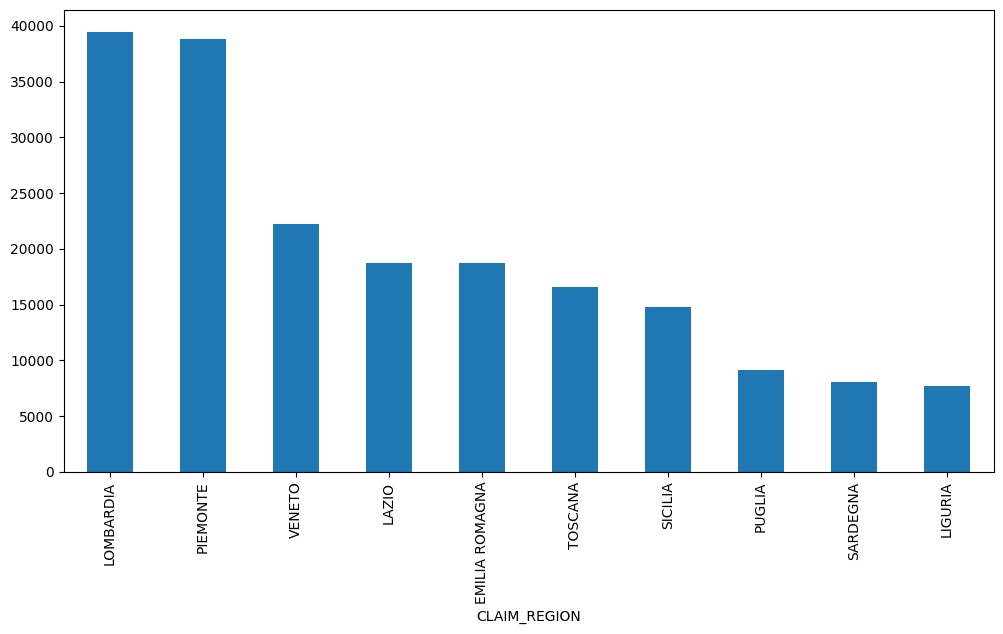

In [40]:
df.groupby('CLAIM_REGION')['CLAIM_ID'].count().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12, 6))

# TODO
1. Gruop by region and plot claim/premium


In [8]:
# ratio
df['CLAIM_AMOUNT_PAID'] = df['CLAIM_AMOUNT_PAID'].apply(replace_comma).astype(float)
df['PREMIUM_AMOUNT_PAID'] = df['PREMIUM_AMOUNT_PAID'].apply(replace_comma).astype(float)

df['RATIO'] = df['PREMIUM_AMOUNT_PAID']/ df['CLAIM_AMOUNT_PAID'] 

In [9]:
df = df[df['POLICYHOLDER_AGE'] > 14]
df = df[df['POLICYHOLDER_AGE'] < 100]
df = df[~df['WARRANTY'].isin(['CIVIL LIABILITY FOR NON-COMMERCIAL VEHICLES', 'KASCO AT FIRST ABSOLUTE RISK', 'DRIVER ACCIDENTS - HOSPITAL DAILY ALLOWANCE'])]

<Axes: xlabel='CLAIM_REGION'>

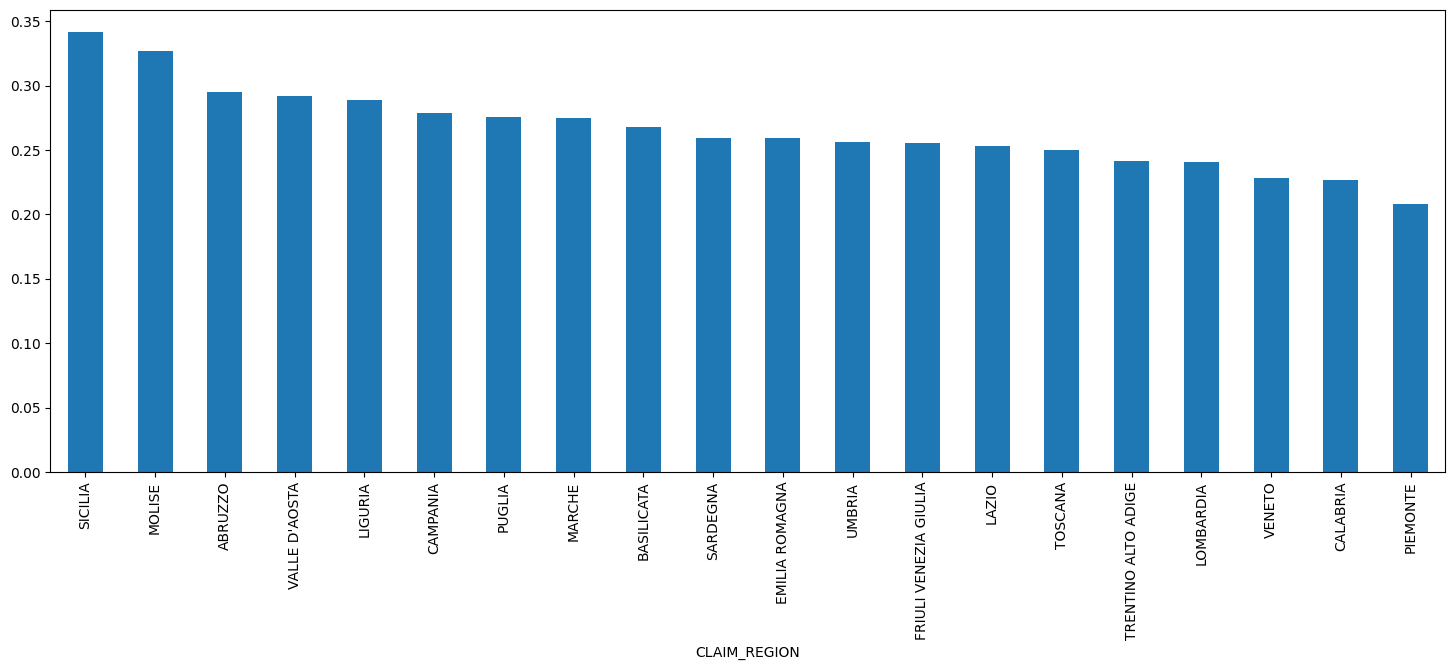

In [10]:
# Group by region and calculate the mean ratio
mean_ratio_by_region = df.groupby('CLAIM_REGION')['RATIO'].mean().sort_values(ascending=False)

# Plot the mean ratio by region
mean_ratio_by_region.plot(kind='bar', figsize=(18, 6))

In [80]:
# normalize with respect to the number of claims

groped_by_warranty = df.groupby(by='WARRANTY')['CLAIM_ID'].count().sort_values(ascending=False)



In [81]:
df['NORMED_RATIO'] = None
max_value = groped_by_warranty.max

for i, row in df.iterrows():
    row.at(i, 'NORMED_RATIO') = row['RATIO'] / (max_value + 1 - groped_by_warranty[row['WARRANTY']])

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (2817540182.py, line 5)

In [82]:
groped_by_warranty

WARRANTY
CIVIL LIABILITY INSURANCE                  135704
GLASSES                                     34881
TRAVEL ASSISTANCE                           26584
NATURAL DISASTERS                           12860
SOCIOPOLITICAL EVENTS                        5985
SPECIAL TRAVEL                               3421
GUARANTEE FAILURES                           2540
THEFT                                        2428
SAFE REIMBURSEMENT OPTION                    1054
GREEN LINE                                    946
ADDITIONAL COVERAGES                          497
POLE POSITION ASSISTANCE                      405
LEGAL PROTECTION                              211
OVER 65                                       169
WILD ANIMAL COLLISION                         141
VEHICLE FIRE                                   98
DRIVER ACCIDENTS - PERMANENT DISABILITY        85
ACCIDENTS                                      73
COLLISION WITH FOREIGN VEHICLES                65
DRIVER ACCIDENTS - MEDICAL EXPENSES      

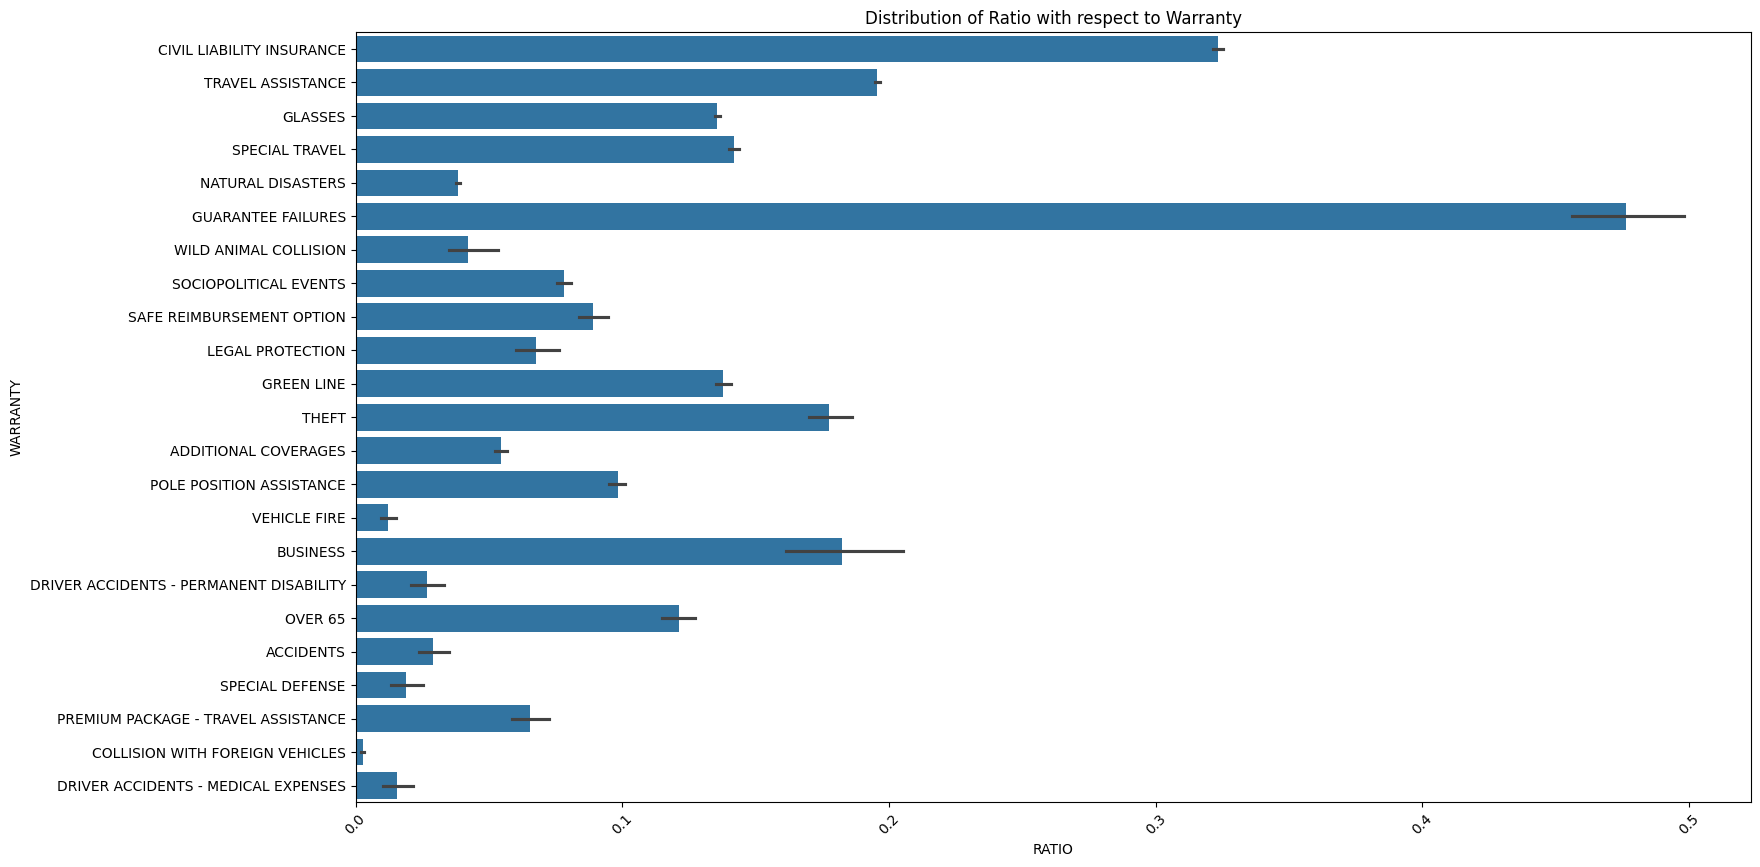

In [83]:
# Plot the distribution of the ratio with respect to WARRANTY
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
sns.barplot(x='RATIO', y='WARRANTY', data=df)
plt.title('Distribution of Ratio with respect to Warranty')
plt.xticks(rotation=45)
plt.show()

In [84]:
df.head()

CLAIM_ID  POLICYHOLDER_AGE POLICYHOLDER_GENDER                   WARRANTY  \
0         1                49                   M  CIVIL LIABILITY INSURANCE   
2         3                75                   F  CIVIL LIABILITY INSURANCE   
3         4                63                   M          TRAVEL ASSISTANCE   
4         5                65                   F  CIVIL LIABILITY INSURANCE   
5         6                56                   M  CIVIL LIABILITY INSURANCE   

  CLAIM_DATE CLAIM_REGION   CLAIM_PROVINCE VEHICLE_BRAND        VEHICLE_MODEL  \
0 2022-06-04      TOSCANA         Grosseto           BMW        Serie 3 (E46)   
2 2023-12-20     CALABRIA  Reggio Calabria          FIAT       PANDA 2A SERIE   
3 2024-01-16      TOSCANA    Massa-Carrara         IVECO    DAILY (1992-1996)   
4 2022-08-10        LAZIO          Viterbo         SMART  forfour 2as. (W453)   
5 2022-11-17       MARCHE  Pesaro e Urbino        YAMAHA              MAJESTY   

   CLAIM_AMOUNT_PAID  PREMIUM_AMOUNT_PAID  CLAIM_LATITUDE  CLAIM_LONGITUDE  \
0            8000.00               393.20       42.775110        11.287804   
2            1316.44               393.20       38.103539        15.639756   
3             309.15                32.21       44.213149        10.052561   
4            1057.70               393.20       42.492952        11.948814   
5             476.00               393.20       43.694113        12.701444   

      RATIO  
0  0.049150  
2  0.298684  
3  0.104189  
4  0.371750  
5  0.826050

In [5]:
process_df = df
process_df['POLICYHOLDER_AGE'] = process_df['POLICYHOLDER_AGE'].astype(int)
process_df['POLICYHOLDER_GENDER'] = process_df['POLICYHOLDER_GENDER'].apply(lambda x: 1 if x == 'M' else 0)
# process_df['CLAIM_DATE'] = process_df['CLAIM_DATE'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

target_col = "RATIO"
feature_cols = [
    'POLICYHOLDER_AGE',
    'POLICYHOLDER_GENDER',
    'WARRANTY',
    'VEHICLE_BRAND',
    'CLAIM_PROVINCE'
]

X = process_df[feature_cols]
y = process_df[target_col]

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['WARRANTY', 'VEHICLE_BRAND', 'CLAIM_PROVINCE'], drop_first=True)
y = process_df[target_col]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

: 

In [ ]:
# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)